# **Question 1 - Extracting Tesla Stock Data Using yfinance**

In [11]:
!pip install yfinance
!pip install plotly
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec

In [12]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# **Question 2 - Extracting Tesla Revenue Data Using Webscraping**

In [13]:
# Fetch Tesla revenue data
def get_tesla_revenue():
    url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    tables = soup.find_all('table')
    for table in tables:
        if 'Tesla Quarterly Revenue' in str(table):
            revenue_table = table
            break

    data = []
    for row in revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            data.append([date, revenue])

    df = pd.DataFrame(data, columns=['Date', 'Revenue'])
    df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Get the revenue data
tesla_revenue = get_tesla_revenue()
tesla_revenue.head()


,Date,Revenue
0,2024-12-31,25707.0
1,2024-09-30,25182.0
2,2024-06-30,25500.0
3,2024-03-31,21301.0
4,2023-12-31,25167.0


# **Question 3 - Extracting GameStop Stock Data Using yfinance**

In [19]:
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# **Question 4 - Extracting GameStop Revenue Data Using Webscraping**

In [20]:
# Fetch GameStop revenue data
def get_gme_revenue():
    url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    tables = soup.find_all('table')
    for table in tables:
        if 'GameStop Quarterly Revenue' in str(table):
            revenue_table = table
            break

    data = []
    for row in revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            data.append([date, revenue])

    df = pd.DataFrame(data, columns=['Date', 'Revenue'])
    df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'])
    return df

    # Get the revenue data
gme_revenue = get_gme_revenue()
gme_revenue.head()


,Date,Revenue
0,2025-01-31,1283
1,2024-10-31,860
2,2024-07-31,798
3,2024-04-30,882
4,2024-01-31,1794


# **Question 5 - Tesla Stock and Revenue Dashboard**

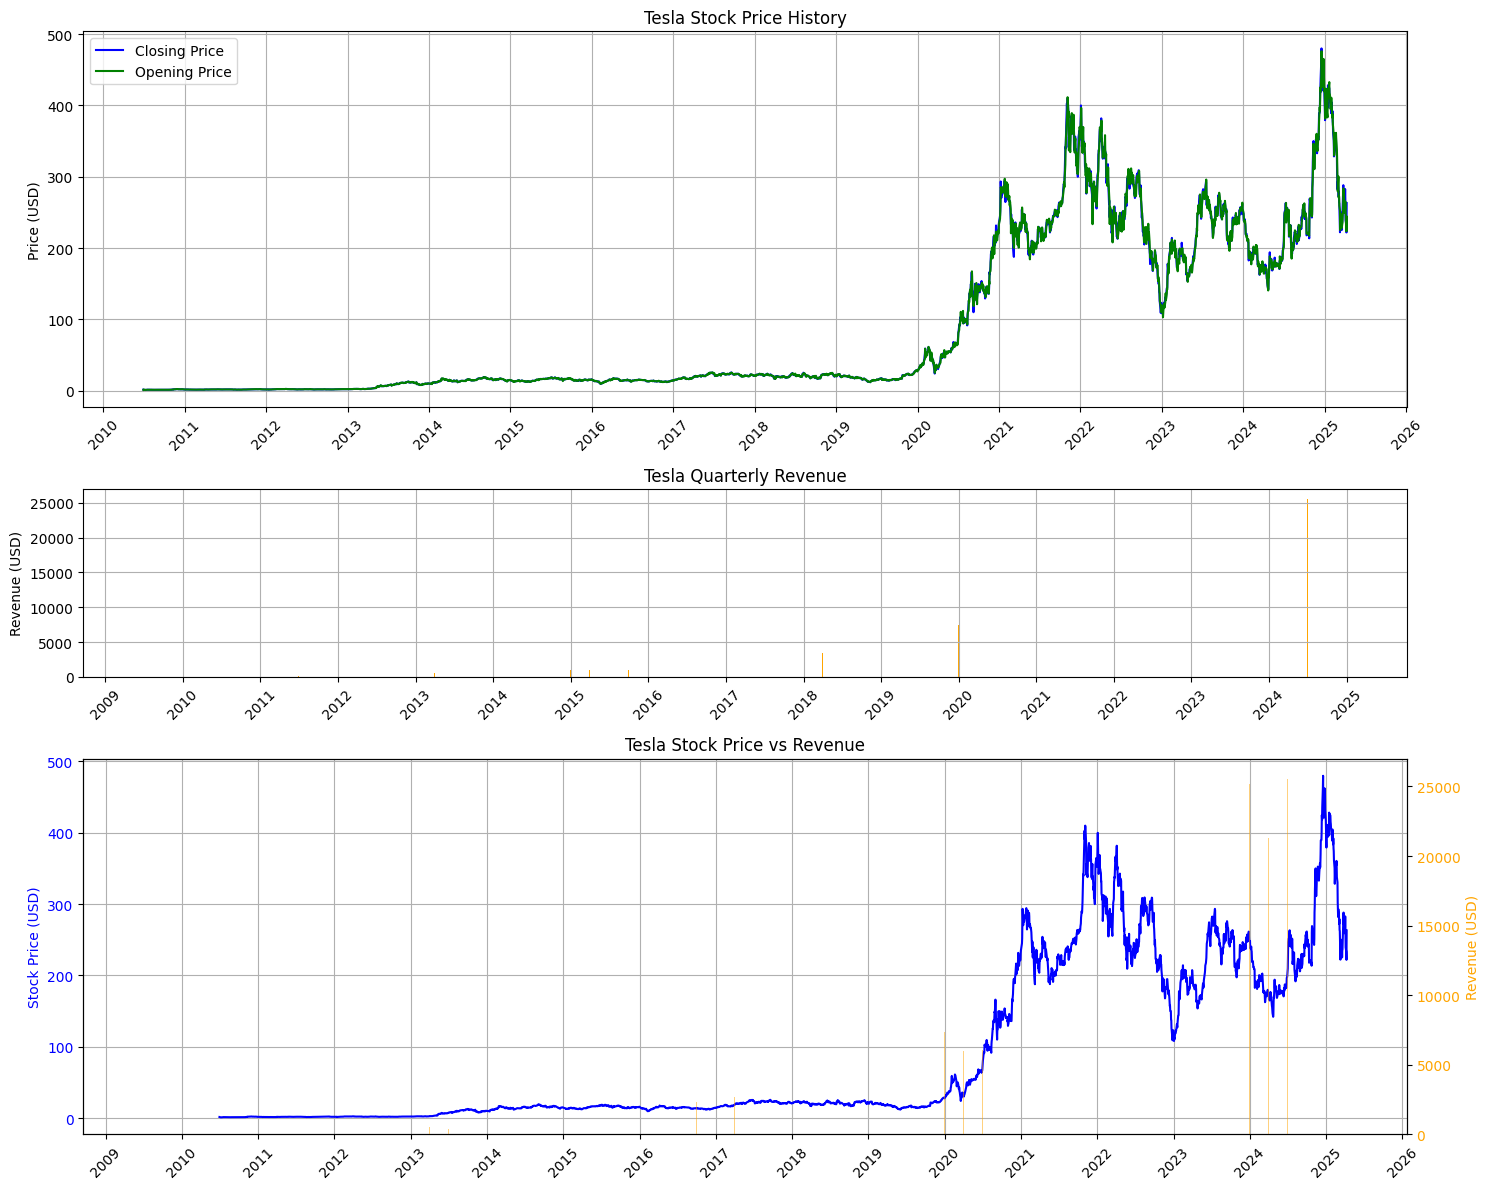

In [16]:
# Create figure with subplots
plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 2])

# Stock Price Plot
ax1 = plt.subplot(gs[0])
ax1.plot(tesla_data['Date'], tesla_data['Close'], label='Closing Price', color='blue')
ax1.plot(tesla_data['Date'], tesla_data['Open'], label='Opening Price', color='green')
ax1.set_title('Tesla Stock Price History')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Revenue Plot
ax2 = plt.subplot(gs[1])
ax2.bar(tesla_revenue['Date'], tesla_revenue['Revenue'], color='orange')
ax2.set_title('Tesla Quarterly Revenue')
ax2.set_ylabel('Revenue (USD)')
ax2.grid(True)

# Combined Plot
ax3 = plt.subplot(gs[2])
ax3.plot(tesla_data['Date'], tesla_data['Close'], label='Stock Price', color='blue')
ax3.set_ylabel('Stock Price (USD)', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

ax3_rev = ax3.twinx()
ax3_rev.bar(tesla_revenue['Date'], tesla_revenue['Revenue'],
            label='Revenue', color='orange', alpha=0.5)
ax3_rev.set_ylabel('Revenue (USD)', color='orange')
ax3_rev.tick_params(axis='y', labelcolor='orange')

ax3.set_title('Tesla Stock Price vs Revenue')
ax3.grid(True)

# Format x-axis
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# **Question 6 - GameStop Stock and Revenue Dashboard**

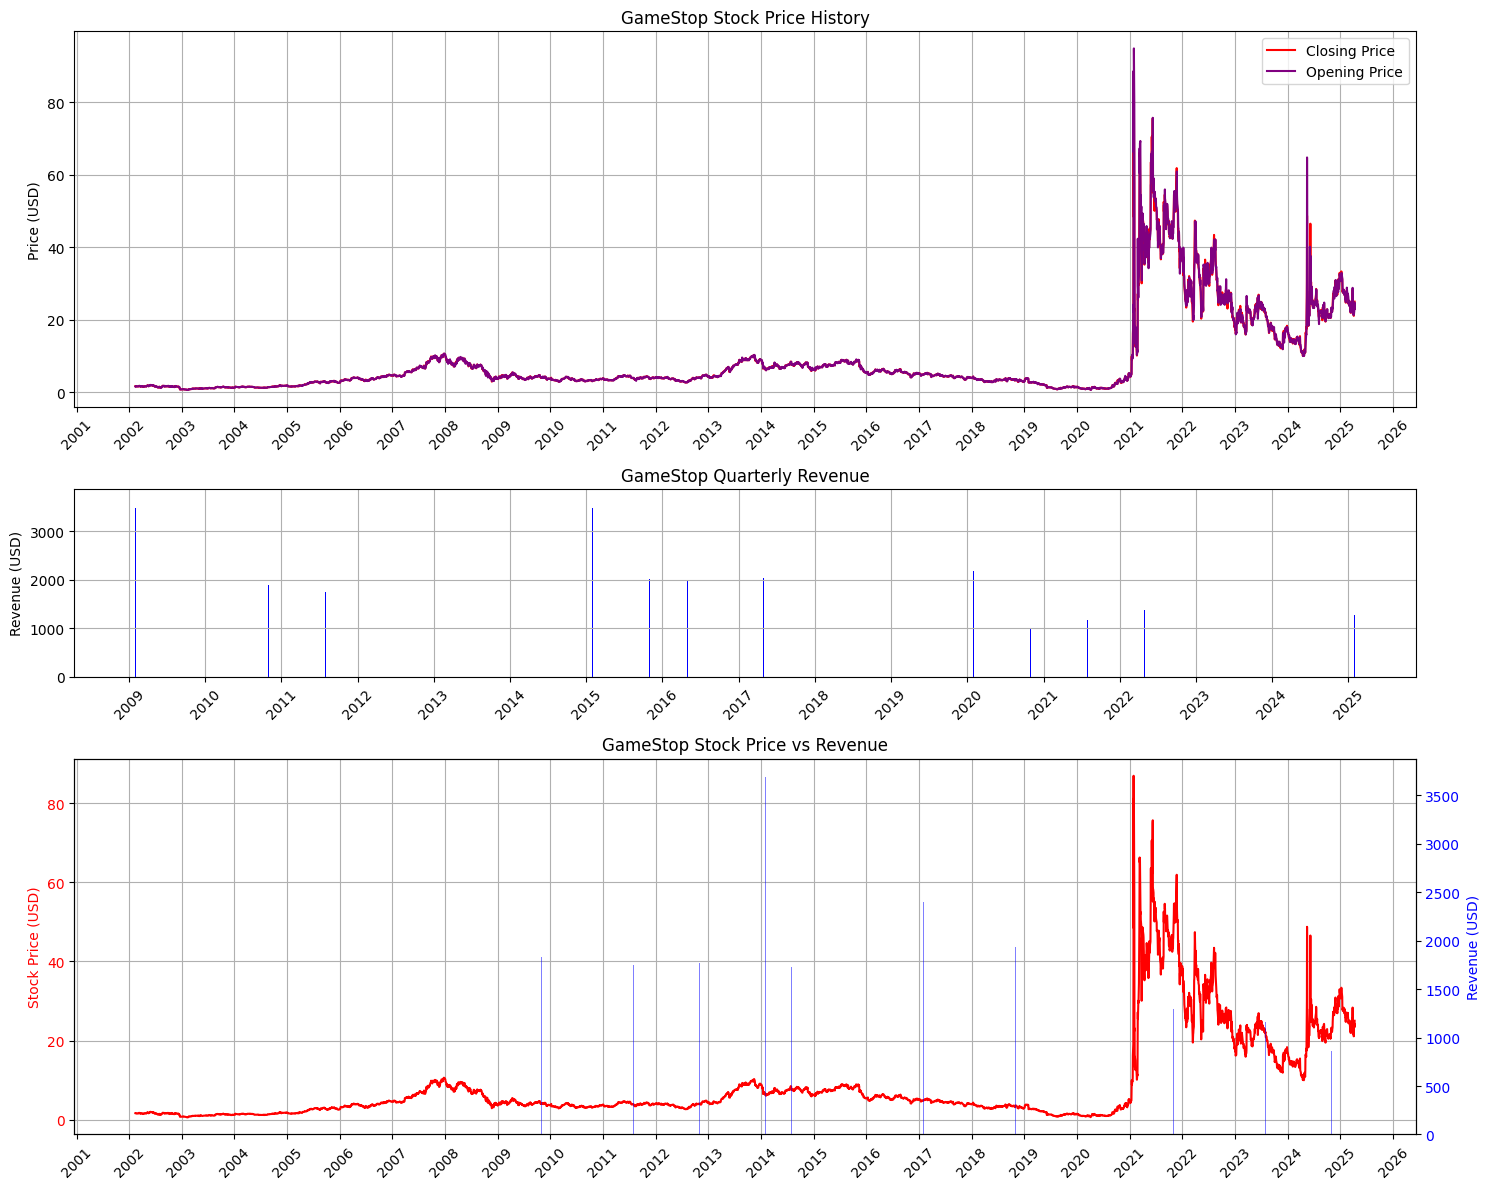

In [21]:
# Create visualization
plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 2])

# Stock Price Plot
ax1 = plt.subplot(gs[0])
ax1.plot(gme_data['Date'], gme_data['Close'], label='Closing Price', color='red')
ax1.plot(gme_data['Date'], gme_data['Open'], label='Opening Price', color='purple')
ax1.set_title('GameStop Stock Price History')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Revenue Plot
ax2 = plt.subplot(gs[1])
ax2.bar(gme_revenue['Date'], gme_revenue['Revenue'], color='blue')
ax2.set_title('GameStop Quarterly Revenue')
ax2.set_ylabel('Revenue (USD)')
ax2.grid(True)

# Combined Plot
ax3 = plt.subplot(gs[2])
ax3.plot(gme_data['Date'], gme_data['Close'], label='Stock Price', color='red')
ax3.set_ylabel('Stock Price (USD)', color='red')
ax3.tick_params(axis='y', labelcolor='red')

ax3_rev = ax3.twinx()
ax3_rev.bar(gme_revenue['Date'], gme_revenue['Revenue'],
            label='Revenue', color='blue', alpha=0.5)
ax3_rev.set_ylabel('Revenue (USD)', color='blue')
ax3_rev.tick_params(axis='y', labelcolor='blue')

ax3.set_title('GameStop Stock Price vs Revenue')
ax3.grid(True)

# Format x-axis
for ax in [ax1, ax2, ax3]:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()